In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import plotly.express as px

import re
import warnings
warnings.filterwarnings('ignore')

<h1 style="color:red">BusinessProblem</h1>

- To find the price of house based on the given features 

<h1 style="color:red">Data Understanding<h1>

In [2]:
df = pd.read_csv("Bengaluru_House_Data.csv")

In [3]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


### Observations:
- There are Null Values in the Dataset
- There are 9 features in the Dataset 3 are float and 6 are categorical

In [5]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

#### Note:
- To fill the Null Values let's check whether Outliers are present or not

<h1 style="color:red">Data PreProcessing</h1>

In [6]:
df.dtypes

area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object

In [7]:
df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [8]:
def cleaning(sento):
    try:
        u = int(sento)
        return u
    except:
        u = sento.split(" ")
        u = u[0]
        u = re.sub('[^0-9]',"",u)
        return u

In [9]:
df['total_sqft'] = df['total_sqft'].apply(lambda x:cleaning(x))

In [10]:
df.dtypes

area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object

In [11]:
df['total_sqft'] = df['total_sqft'].astype("float64")

The Categorical Data: area_type
The Categorical Data: availability
The Categorical Data: location
The Categorical Data: size
The Categorical Data: society


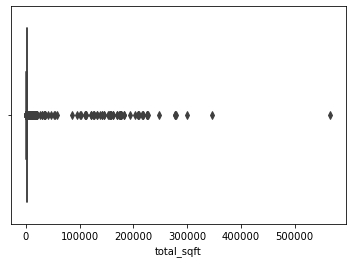

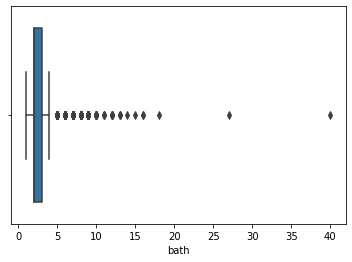

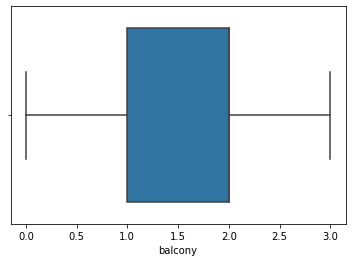

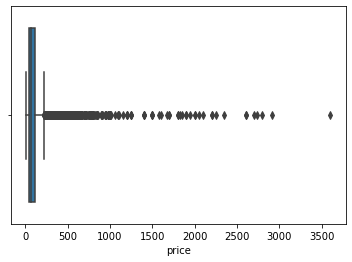

In [12]:
num = []
cat = []
for i in df.columns:
    try:
        sns.boxplot(df[i])
        plt.show()
        num.append(i)
    except:
        print("The Categorical Data: {}".format(i))
        cat.append(i)

This is Categorical Data :area_type
This is Categorical Data :availability
This is Categorical Data :location
This is Categorical Data :size
This is Categorical Data :society


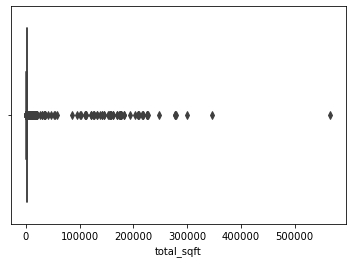

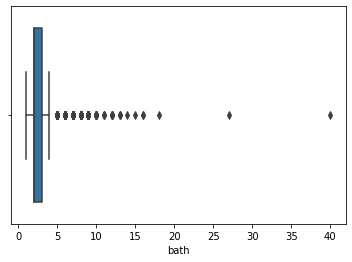

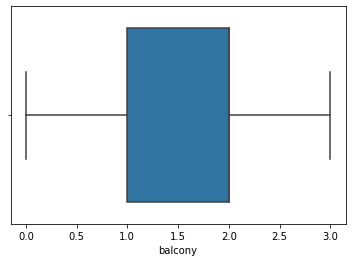

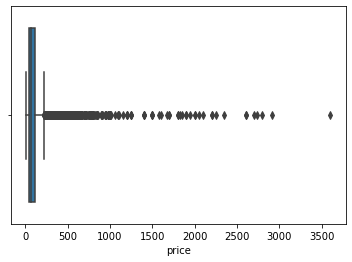

In [13]:
for i in df.columns:
    try:
        sns.boxplot(df[i])
        plt.show()
    except:
        print("This is Categorical Data :{}".format(i))

### Note:
- There are Outliers in Bath (fill Bath Value with Median) and remaining Categorical fill with Mode.

In [14]:
from sklearn.impute import SimpleImputer

In [15]:
mean = SimpleImputer(missing_values=np.nan,strategy="mean")

In [16]:
mode = SimpleImputer(missing_values=np.nan,strategy="most_frequent")

In [17]:
for i in df.columns:
    if type(df[i][0])==str:
        if df[i].isnull().sum()==0:
            pass
        else:
            df[i]=mode.fit_transform(df[[i]])
            
    else:
            df[i]=mean.fit_transform(df[[i]])

In [18]:
df.isnull().sum()

area_type       0
availability    0
location        0
size            0
society         0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

# Treating Outliers

In [19]:
from feature_engine.outliers import Winsorizer

In [20]:
win = Winsorizer(capping_method = 'iqr',tail = 'both', fold = 1.5, variables = ["bath"])

In [21]:
df["bath"] = win.fit_transform(df[["bath"]])

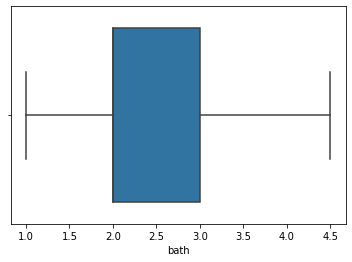

In [22]:
sns.boxplot(df["bath"])
plt.show()

### Note:
- outliers removed, let's check for skewness

<AxesSubplot:>

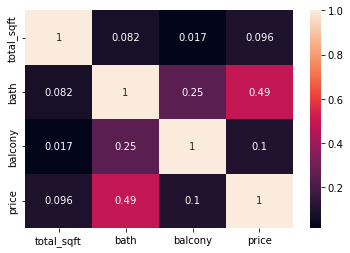

In [23]:
sns.heatmap(df.corr(),annot=True)

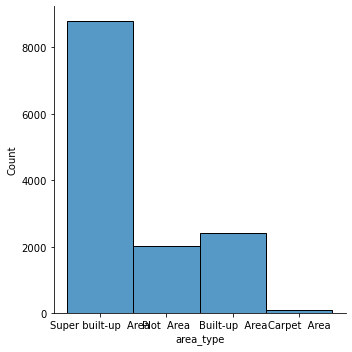

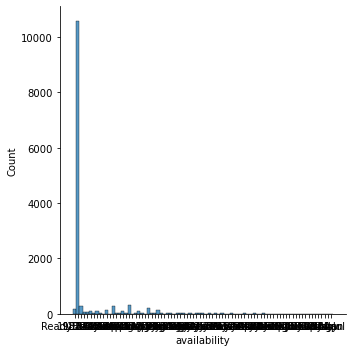

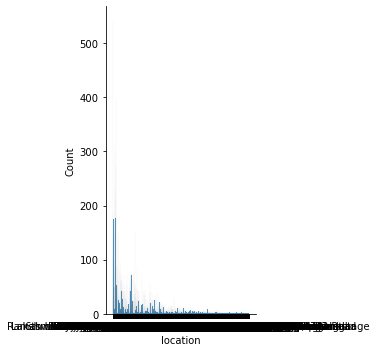

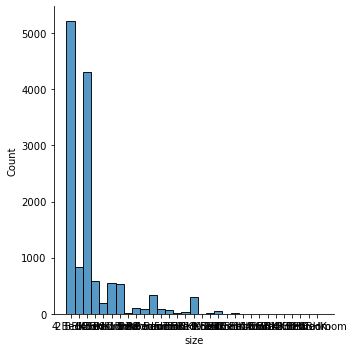

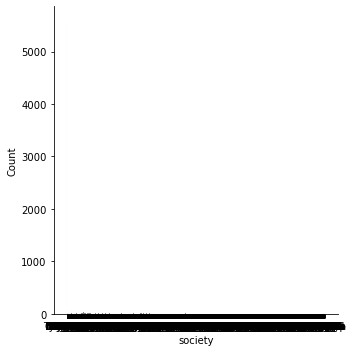

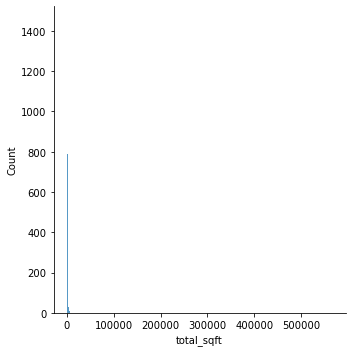

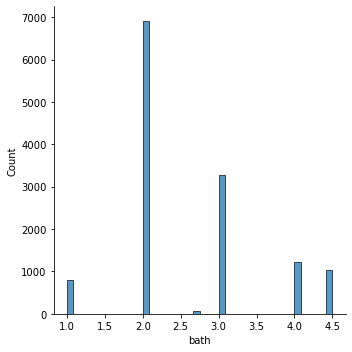

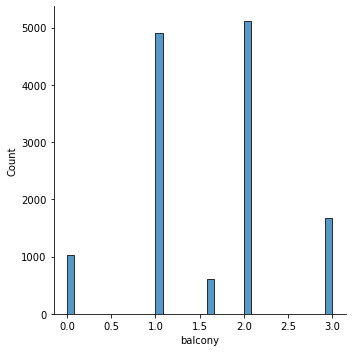

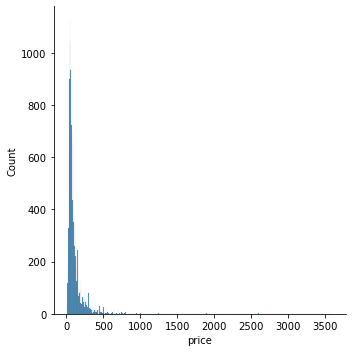

In [24]:
for i in df.columns:
    try:
        sns.displot(df[i])
        plt.show()
    except:
        pass

In [25]:
cat

['area_type', 'availability', 'location', 'size', 'society']

In [26]:
df.head(3)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056.0,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600.0,4.5,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,GrrvaGr,1440.0,2.0,3.0,62.00


In [27]:
for i in cat:
    x = df[i].nunique()
    print(" {} The Unique values in {}".format(x,i)) 

 4 The Unique values in area_type
 81 The Unique values in availability
 1305 The Unique values in location
 31 The Unique values in size
 2688 The Unique values in society


## Encoding

In [28]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [29]:
le = LabelEncoder()
one = OneHotEncoder()

In [30]:
df["area_type"] = le.fit_transform(df["area_type"])

In [31]:
df["size"] = le.fit_transform(df["size"])

In [32]:
df.head(2)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,3,19-Dec,Electronic City Phase II,13,Coomee,1056.0,2.0,1.0,39.07
1,2,Ready To Move,Chikka Tirupathi,19,Theanmp,2600.0,4.5,3.0,120.00


In [33]:
df.drop(columns=["availability","location","society"],inplace=True)

In [34]:
x = df.drop("price",axis=1)

In [35]:
y = df["price"]

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=10)

In [38]:
from sklearn.ensemble import RandomForestRegressor

In [39]:
model = RandomForestRegressor()

In [40]:
model.fit(x_train,y_train)

RandomForestRegressor()

In [41]:
model.score(x_train,y_train)

0.8984574166419881

In [42]:
model.score(x_test,y_test)

0.5619697771923221

### Note:
- Model is Over Fitted

In [43]:
y_pred = model.predict(x_test)

In [44]:
y_pred

array([ 58.89015138,  62.88238228, 155.98333333, ..., 287.24833333,
       186.05014286, 150.46619048])

## Evaluation 

In [45]:
from sklearn.metrics import mean_squared_error

In [46]:
from math import sqrt

In [47]:
mse = mean_squared_error(y_test,y_pred)
mse

12304.14775208182

In [48]:
rmse = sqrt(mean_squared_error(y_test,y_pred))
rmse

110.92406299843971